# Heart disease classification using machine learning


#### The dataset used for this project is available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci
#### Data contains;

1.age
<br>
2.sex
<br>
3.chest pain type (4 values)
<br>
4.resting blood pressure
<br>
5.serum cholestoral in mg/dl
<br>
6.fasting blood sugar > 120 mg/dl
<br>
7.resting electrocardiographic results (values 0,1,2)
<br>
8.maximum heart rate achieved
<br>
9.exercise induced angina
<br>
10.oldpeak = ST depression induced by exercise relative to rest
<br>
11.the slope of the peak exercise ST segment
<br>
12.number of major vessels (0-3) colored by flourosopy
<br>
13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
<br>

## 1. Preparing the tools


In [2]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

## 2. Loading data 

In [3]:
# Reading csv file
df = pd.read_csv('heart-disease.csv')
df_copy = df.copy()
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

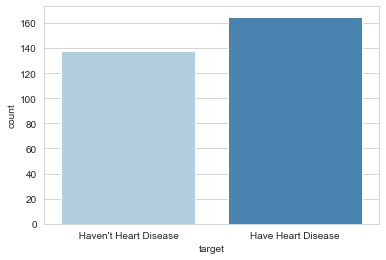

In [50]:
sns.countplot(x="target", data=df, palette="Blues")
plt.xticks(ticks=[0,1],labels =[" Haven't Heart Disease","Have Heart Disease"],rotation=0);

plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Our dataset does not have a missing value.

## 3. Exploring parameters related to heart disease

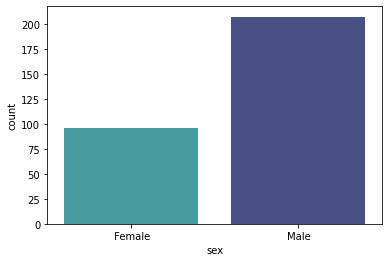

In [9]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xticks(ticks=[0,1],labels =[" Female","Male"],rotation=0);
plt.show()

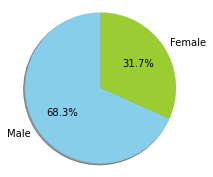

In [10]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(3,3))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

In [11]:
countFemale = len(df[df.sex == 0 ])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


### Heart Disease Frequency for Sex

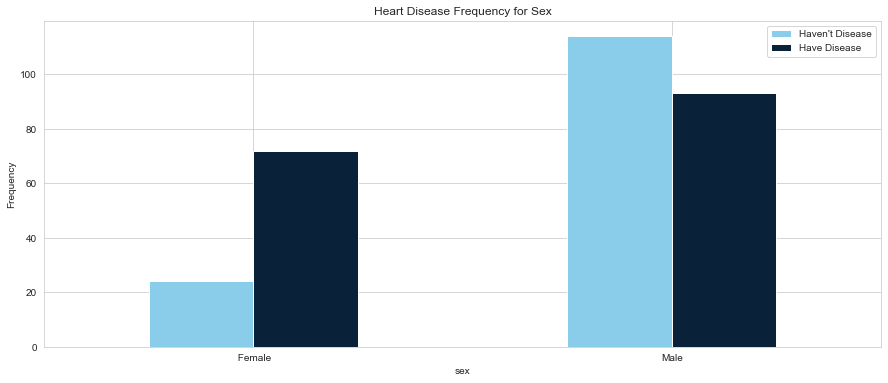

In [48]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#8ACDEA','#0A2239' ])
plt.title('Heart Disease Frequency for Sex')

#plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1],labels =[" Female","Male"],rotation=0);
plt.show()


### Heart Disease Frequency for Ages

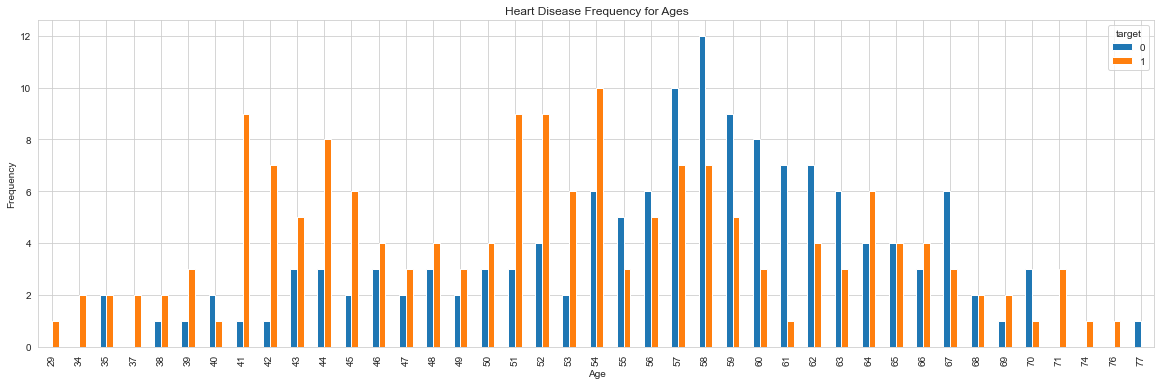

In [47]:

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### Maximum Heart Rate By Age

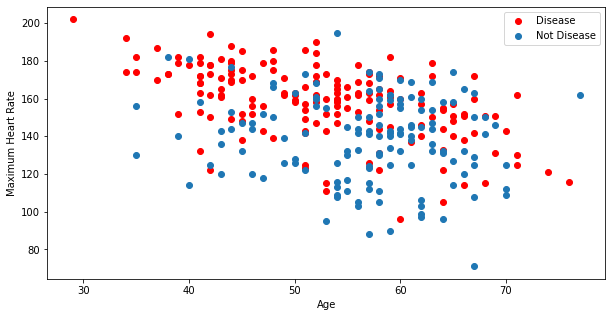

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### Heart Disease Frequency According To FBS

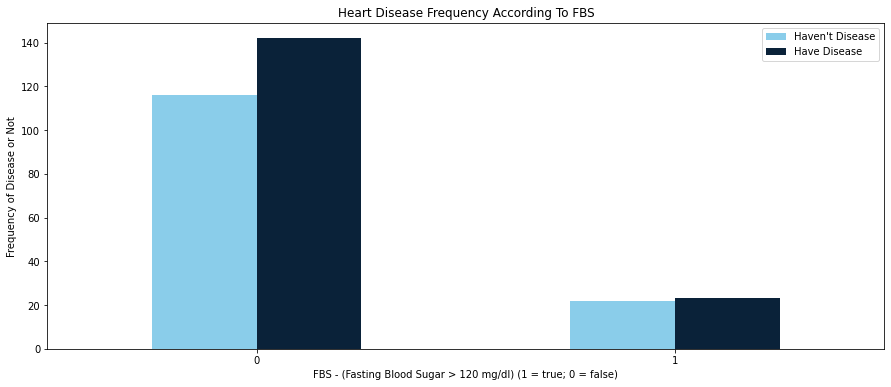

In [15]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#8ACDEA','#0A2239'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Heart Disease Frequency versus Chest Pain Type


In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


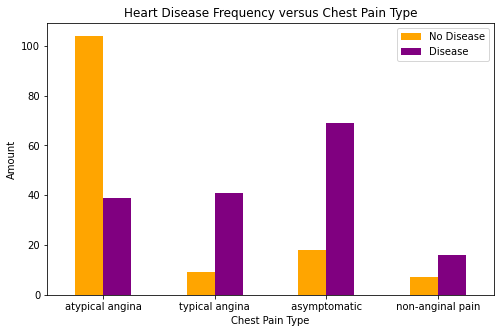

In [17]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(8,5),
                                   color=["orange", "purple"])

# Add some communication
plt.title("Heart Disease Frequency versus Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")

plt.legend(["No Disease", "Disease"])
plt.xticks(ticks=[0,1,2,3],labels =["atypical angina","typical angina"," asymptomatic "," non-anginal pain "],rotation=0);

In [18]:
# correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


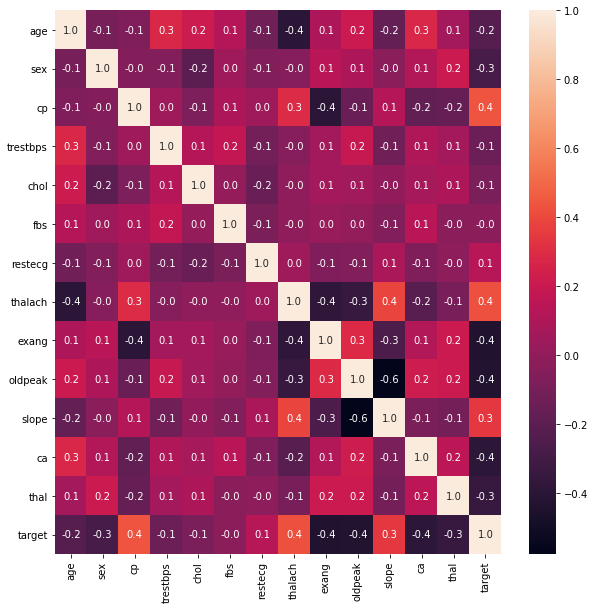

In [19]:
# plt.figure(figsize=(10, 5))
# sns.heatmap(df.corr());
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

## 4. Modelling 

In [20]:
# Splitting data into X and y
x = df.drop("target", axis=1)

y = df["target"]

In [21]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [24]:
print(len(x_train))
print(len(y_train))

242
242


We will try 2 different classification models for this , i.e. <strong>logistic regressor</strong> and <strong>random forest classifier.</strong>

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(x_train, y_train)
        
        # append the evaluated score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,
                             y_test=y_test)

model_scores

D:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [27]:
#saving accuracies in dictionary for comparison
accuracies = {}
accuracies['Logistic Regression'] = 88.524
accuracies['Random Forest'] = 83.6

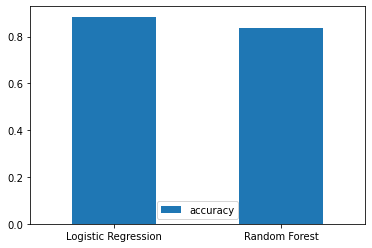

In [28]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0)
plt.show()

In [29]:
#### Creating Dummy Variables <br>
#Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
# a = pd.get_dummies(df['cp'], prefix = "cp")
# b = pd.get_dummies(df['thal'], prefix = "thal")
# c = pd.get_dummies(df['slope'], prefix = "slope")

# frames = [df, a, b, c]
# df = pd.concat(frames, axis = 1)
# df.head()
# df = df.drop(columns = ['cp', 'thal', 'slope'])
# df.head()

### K-Nearest Neighbors Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 63.93%


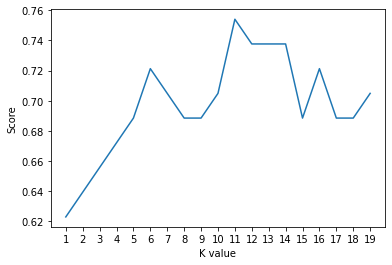

Maximum KNN Score is 75.41%


In [31]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

### Support vector machines

In [32]:
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 70.49%


### Naive Bayes Classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 85.25%


## 5. Comparing between different algorithms accuracies 

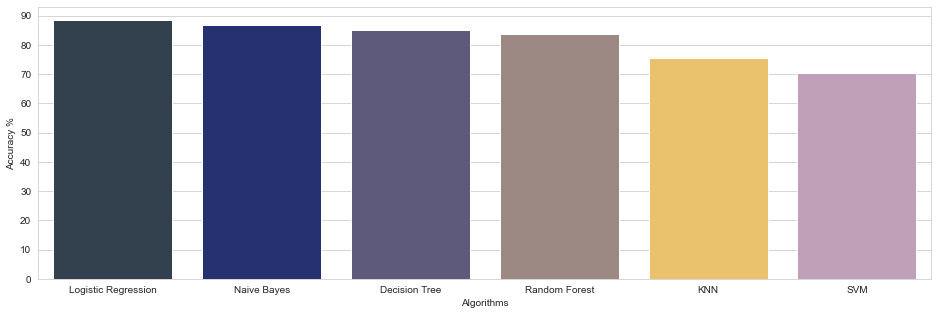

In [35]:
colors = ["#2E4052", "#19297C", "#585481", "#A1867F","#FFC857","#C49BBB"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
Z={k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse = True)}
sns.barplot(x=list(Z.keys()), y=list(Z.values()), palette=colors)
plt.show()